### Arbeidskrav 9
Forelesning 14 - Konsumentatferd

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import sympy as sp
from mpmath import findroot
from sympy.solvers import solve
from IPython.display import Markdown

from cycler import cycler
from matplotlib.ticker import MaxNLocator
import matplotlib.ticker as mticker
import matplotlib.pylab as pylab


# custome plot style
params  = {
"lines.linewidth": 1.5,

"legend.fancybox": "true",

"axes.prop_cycle": cycler('color', ["#ffa822","#1ac0c6","#ff6150","#30B66A","#B06AFF","#FF21E1"]),
"axes.facecolor": "#2b2b2b",
"axes.axisbelow": "true",
"axes.grid": "true",
"axes.edgecolor": "#2b2b2b",
"axes.linewidth": 0.5,
"axes.labelpad": 0,

"patch.edgecolor": "#2b2b2b",
"patch.linewidth": 0.5,

"grid.linestyle": "--",
"grid.linewidth": 0.5,
"grid.color": "#b8aba7",

"xtick.major.size": 0,
"xtick.minor.size": 0,
"ytick.major.size": 0,
"ytick.minor.size": 0,

"font.family":"monospace",
"font.size":10.0,
"text.color": "#FFE9E3",
"axes.labelcolor": "#b8aba7",
"xtick.color": "#b8aba7",
"ytick.color": "#b8aba7",

"savefig.edgecolor": "#2b2b2b",
"savefig.facecolor": "#2b2b2b",

"figure.subplot.left": 0.08,
"figure.subplot.right": 0.95,
"figure.subplot.bottom": 0.09,
"figure.facecolor": "#2b2b2b"}

pylab.rcParams.update(params)
print("finish")

finish


**Oppgaver**       


**a)** 

I eksempelet faller etterspørselen etter gode 2 når $p_1$ øker. Dette betyr at den negative inntektseffekten er større enn den positive substitusjonseffekten. Dette viser seg å alltid være tilfelle i LES modellen med $\gamma_i$ positiv for alle goder. Som [Chang og Fawson (1994)](https://digitalcommons.usu.edu/cgi/viewcontent.cgi?article=1036&context=eri) skriver: "When the $\gamma_i$ are positive, the cross price effects are negative, a fact implying that the income effects are stronger than the substitution effects". Forklar.  

**Answer:**

Når prisen på $p_1$ øker i LES-modellen med positive $\gamma_i$ for alle goder, reduseres etterspørselen etter $p_2$. Dette skyldes at den negative inntektseffekten dominerer over den positive substitusjonseffekten. Det betyr at reduksjonen i kjøpekraft på grunn av prisøkningen på $p_1$ er større enn forbrukerens ønske om å erstatte $p_1$ med $p_2$, noe som gir en negativ krysspris-effekt.

**b)** 

I Stone-Geary formuleringen kan $\gamma_i$ være negative tall. Hva er konsekvensen av dette for krysspriseffekten? 

**Answer:**

Når $\gamma_i$ er negativ, kan det påvirke krysspriseffekten på en annen måte enn når det er positivt. Med negative $\gamma_i$ verdier kan det hende at inntektseffekten ikke lenger dominerer over substitusjonseffekten. Dette betyr at krysspriseffekten kan bli positiv, noe som indikerer at når prisen på ett gode øker, kan etterspørselen etter det andre godet også øke. Dette skjer fordi en negativ $\gamma_i$ verdi gjør godet mer av en luksusvare, og substitusjonseffekten blir sterkere, endrer forholdet mellom inntektseffekten og substitusjonseffekten.

**c)** 

Tenk at konsumenten i det forrige eksempelet har en Cobb-Douglas nyttefunksjon $U(x_1,x_2)=x_1^{.4}x_2^{.25}$. Hvordan ser inntekts- og substitusjonseffektene ut nå? Sammenlikn med Stone-Geary tilfellet.

**Answer:**

In [4]:
def define_symbols():
    x_1, x_2, p_1, p_2, m, a, b, U_0 = sp.symbols("x_1 x_2 p_1 p_2 m a b U_0", real=True, positive=True)
    return x_1, x_2, p_1, p_2, m, a, b, U_0

def utility_function(x_1,a,x_2,b):
    return x_1**a * x_2**b

def demand_functions(x_1, x_2, p_1, p_2, m):
    x_1_eq = x_1 + (x_1 / p_1) * (m - p_1 * x_1 - p_2 * x_2)
    x_2_eq = x_2 + (x_2 / p_2) * (m - p_1 * x_1 - p_2 * x_2)
    return x_1_eq, x_2_eq

def equilibrium_utility(x_1,a, x_2, b, x_1_eq, x_2_eq):
    nytte_cb = utility_function(x_1,a,x_2,b)
    V = nytte_cb.subs([(x_1,x_1_eq),(x_2, x_2_eq)])
    return V

def ind_k_fn(x_1, U_0):
    return U_0**4 / x_1**1.6

def solve_indifference_curve(x_1, x_2, U_0, nytte_cb):
    ind_k = sp.solve(nytte_cb - U_0, x_2)[0]
    return ind_k

def budget(M, p1, p2, x1):
    return M/p2 - p1*x1/p2

# Setup
x_1, x_2, p_1, p_2, m, a, b, U_0 = define_symbols()

_a_ = .4
_b_ = .25

x_1_eq, x_2_eq = demand_functions(x_1, x_2, p_1, p_2, m)

nytte_cb = utility_function(x_1, _a_, x_2, _b_)

V = equilibrium_utility(x_1, _a_, x_2, _b_, x_1_eq, x_2_eq)

ind_k = solve_indifference_curve(x_1, x_2, U_0, nytte_cb)
ind_k_fn_var = ind_k_fn(x_1, U_0)

x_2_ind_sol=sp.solve( utility_function(x_1,a,x_2,b)-U_0,x_2)[0]
x_2_ind_sol
indiff_x_2=sp.lambdify( (U_0,a,b,x_1), x_2_ind_sol)


In [5]:
U = utility_function(x_1,a,x_2,b)
bud=p_1*x_1+p_2*x_2
msb = sp.diff(U, x_1)/sp.diff(U,x_2)
x_2_rel=sp.solve(msb-p_1/p_2,x_2)[0]
budsj=bud.subs(x_2,x_2_rel)
x_1_eq= sp.solve(budsj-m,x_1)[0]
x_2_eq= x_2_rel.subs(x_1,x_1_eq)
U_max=U.subs([(x_1,x_1_eq),(x_2,x_2_eq)])

x_1_num = x_1_eq.subs([(a,.4),(b,.25),(m,100),(p_1,2),(p_2,2)])
x_2_num = x_2_eq.subs([(a,.4),(b,.25),(m,100),(p_1,2),(p_2,2)])
nytte = U_max.subs([(a,.4),(b,.25),(m,100),(p_1,2),(p_2,2)])

In [6]:
x_1_num_2 = x_1_eq.subs([(a,.4),(b,.25),(m,100),(p_1,10),(p_2,2)])
x_2_num_2 = x_2_eq.subs([(a,.4),(b,.25),(m,100),(p_1,10),(p_2,2)])
nytte_2 = U_max.subs([(a,.4),(b,.25),(m,100),(p_1,10),(p_2,2)])

nytte_num_3 = float(nytte.subs([(a,.4),(b,.25),(m,100),(p_1,2),(p_2,2)]))
nytte_ny_num_3 = U_max.subs([(a,.4),(b,.25),(p_1,10),(p_2,2)])

#fikt_m = sp.solve(V_m-nytte_sg_num, m)[0]
#fikt_m

fikt_m = sp.solve(nytte_ny_num_3 - nytte_num_3, m)[0]

x_1_cb_komp = x_1_eq.subs([(a,.4),(b,.25),(m,fikt_m),(p_1,10),(p_2,2)])
x_2_cb_komp = x_2_eq.subs([(a,.4),(b,.25),(m,fikt_m),(p_1,10),(p_2,2)])
nytte_3 = U_max.subs([(a,.4),(b,.25),(m,fikt_m),(p_1,2),(p_2,2)])

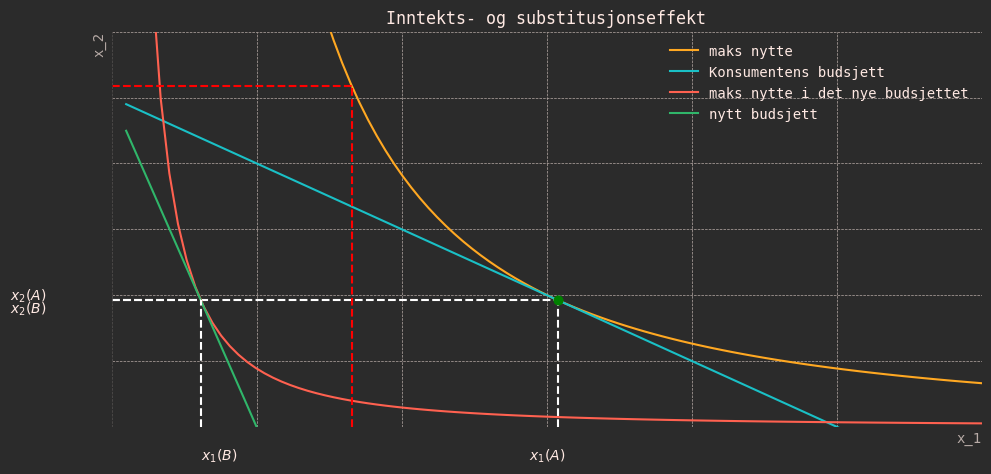

In [7]:
x = np.linspace (1.01,60,100)

def create_ax(x_label:str='x_label',y_label:str='y_label',lim:list=[(0,None),(0,None)],x_pos:str = 'right',y_pos:str='top'):
                fig, ax = plt.subplots(figsize=(10,5))
                ax.set_ylabel(y_label, loc=y_pos)
                ax.set_xlabel(x_label, loc=x_pos)
                ax.set(xlim=lim[0])
                ax.set(ylim=lim[1])
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                
                return fig, ax

graph_Xmin = 0
graph_Xmax = 60
graph_Ymin = 0
graph_Ymax = 60

fig, ax = create_ax(x_label='x_1',
                    y_label='x_2',
                     lim=[(graph_Xmin,graph_Xmax),(graph_Ymin,graph_Ymax)],
)

ax.set_yticklabels([])
ax.set_xticklabels([])

ax.plot(x, indiff_x_2(nytte,.4,.25,x), label='maks nytte')
ax.plot(x, budget(100, 2, 2, x), label = 'Konsumentens budsjett')
ax.plot(x_1_num, x_2_num, marker='o', color='green')

# tegn inn tilpasningen

ax.vlines(x_1_num,0,x_2_num, color='white',ls='dashed')
ax.hlines(x_2_num,0,x_1_num, color='white',ls='dashed')

ax.annotate('$x_1(A)$', (x_1_num-2, -5), annotation_clip=False)
ax.annotate('$x_2(A)$', (-7, x_2_num), annotation_clip=False)

ax.plot(x, indiff_x_2(nytte_2,.4,.25,x), label='maks nytte i det nye budsjettet')
ax.plot(x, budget(100, 10, 2, x), label = 'nytt budsjett')
ax.plot(x_1_num, x_2_num, marker='o', color='green')

ax.vlines(x_1_num_2,0,x_2_num_2, color='white',ls='dashed')
ax.hlines(x_2_num_2,0,x_1_num_2, color='white',ls='dashed')

ax.annotate('$x_1(B)$', (x_1_num_2, -5), annotation_clip=False)
ax.annotate('$x_2(B)$', (-7, x_2_num_2-2), annotation_clip=False)

ax.vlines(x_1_cb_komp, 0, x_2_cb_komp, ls='dashed', color='red')
ax.hlines(x_2_cb_komp, 0, x_1_cb_komp, ls='dashed', color='red')

# tittel
ax.set_title('Inntekts- og substitusjonseffekt')

#vis navnene:
ax.legend(loc='best',frameon=False);